General Info:
This is Notebook for analysing tiff exports created with the family of FLIM-GUIs of SymPhoTime 64 software.

Feature List:
-Display Intensity Image
-Display Lifetime Image
-Set Intensity threshold
-Get Lifetime Profile accross line
-2D Histogram of Intensity vs Lifetime
-1D histogram of lifetime of the image and over selected ROI based on threshold

Coming next:
** Automated saving of all plots as .jpg  and .ascii
** Analysis of morphological features of the imagr based on lifetime information
** Batch Processing of several .tiff files 


Before you start: 
-Open Terminal and installa the following packages :

#conda install -c conda-forge pims
#conda install -c conda-forge numpy
#conda install -c conda-forge pillow

In [76]:
#IMPORT NECESSARY PACKAGES
import numpy as np
import matplotlib.pyplot as plt
import pims
import skimage
#import pillow

Load the an EXAMPLE.tiff  
The number of frames depends on what exactly the image is formed of. If the exported image is a
fastFLIM images the tiff file will contain 2 frames:
--intensity
--average lifetime (unfitted, this is the average photon arrival time)
After a "FLIM FIT " is performed in SymPhoTime the two frames can be
--intensity
--average lifetime (intensity weighted average lifetime )


In [77]:
#load image ->tnsform frame objects into arrays
v = pims.TiffStack('daisy.tiff')
print('frames: ',len(v))

#Frame objects returned by PIMS are a subclass of numpy.ndarray, adding two new attributes:
#frame_no, an integer
#metadata, a dictionary
intensity=v[0]
lifetime=v[1]


#len(v[1]) 
im_size=lifetime.shape # tuple
#len(lifetime)
im_intensity=np.zeros(im_size)
im_lifetime=np.zeros(im_size)
lifetime2=1E+9*lifetime # lifetime values given in ns
for i in range(1,im_size[0]):
   im_intensity[i,:] = intensity[i,:]
for j in range(1,im_size[0]):  
    im_lifetime[j,:] = lifetime2[j,:]
     


frames:  2


/opt/conda/lib/python3.6/site-packages/tifffile/tifffile.py:2159: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


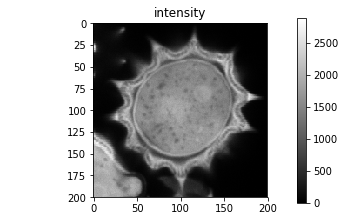

In [78]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('intensity')

plt.imshow(im_intensity,cmap="gray" )
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()


#######
#apply a simple INTENSITY  threashold. Show all pixels with intensity value higher than threashold
##########################################
threshold=2000 #threshold given in counts
##########################################

thres_image_ROI_mask=np.ones(im_size)
for i in range(im_size[0]):
    for j in range(im_size[1]):
      if im_intensity[i,j] < threshold :
        
        thres_image_ROI_mask[i,j]=0
        
ROI_pixels = np.nonzero(thres_image_ROI_mask)


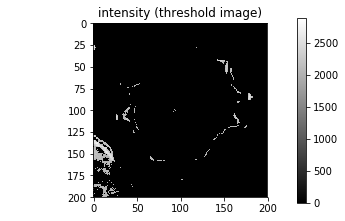

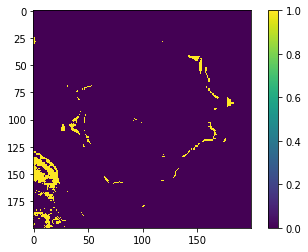

In [79]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('intensity (threshold image)')

plt.imshow((im_intensity*thres_image_ROI_mask),cmap="gray")
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

ax = fig.add_subplot(211)
ax.set_title('intensity (threshold image)')

plt.imshow(thres_image_ROI_mask)
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

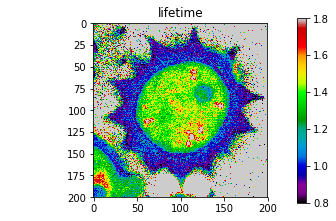

In [90]:
fig = plt.figure(figsize=(6,3.2))
ax = fig.add_subplot(111)
ax.set_title('lifetime')
plt.imshow(lifetime2,vmin=.8,vmax=1.8,cmap="nipy_spectral") # This also sets the scale for the colormap to 1.8ns - 3ns
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()
#Colormap Possible values are:
#Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r,
#Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r,
#PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn,
#PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, 
#RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, 
#Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, 
#Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, 
#YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, 
#cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, 
#gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r,
#gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2,
#gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, 
#magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, 
#prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r,
#tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r,
#winter, winter_r
#def onclick(event):
 #   print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
  #        ('double' if event.dblclick else 'single', event.button,
   #        event.x, event.y, event.xdata, event.ydata))
 

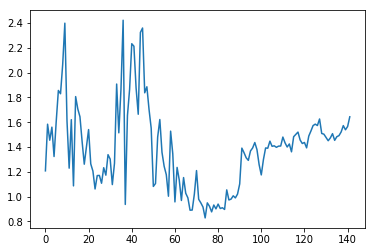

In [91]:
  #THis is for getting lifetime profiles along lines . It should be improved to include "EVENT handles" on mouse click
from skimage.measure import profile_line
aa = skimage.measure.profile_line(im_lifetime, [1,1], [100,100], linewidth=1, order=1, mode='constant', cval=0.0)
plt.plot(aa)

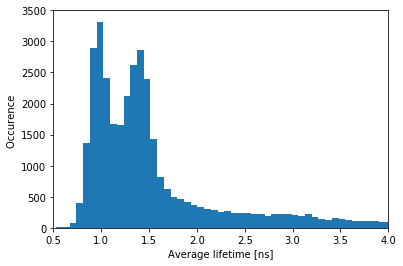

In [89]:
%matplotlib inline
plt.hist(list(im_lifetime.flat),  bins=600)
plt.ylabel('Occurence ');
plt.xlabel('Average lifetime [ns]');
#plt.axis((0.5E-9,2.5E-9,0,1.25E9));
plt.axis((0.5,4,0,3500));


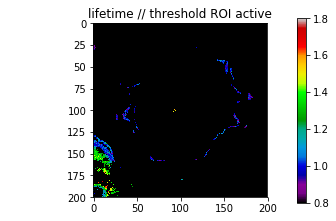

39999

In [66]:
fig = plt.figure(figsize=(6,3.2))
ax = fig.add_subplot(111)
ax.set_title('lifetime // threshold ROI active')
plt.imshow(lifetime2*thres_image_ROI_mask,vmin=.8,vmax=1.8, cmap="nipy_spectral") 
# This also sets the scale for the colormap to 1.8ns - 3ns
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

ROILifetime = lifetime2*thres_image_ROI_mask
Listlifetime = list(filter(lambda a: a > 0,ROILifetime.flat))
Listlifetime
len(List_lifetime)

1035

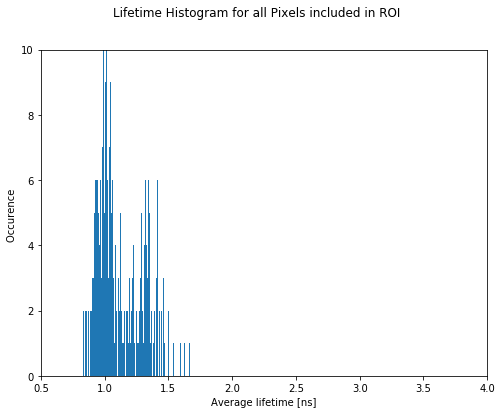

In [74]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
plt.hist(Listlifetime,  bins=600)
plt.ylabel('Occurence ');
plt.xlabel('Average lifetime [ns]');
#plt.axis((0.5E-9,2.5E-9,0,1.25E9));
plt.suptitle("Lifetime Histogram for all Pixels included in ROI")
plt.axis((0.5,4,0,10));
len(Listlifetime)
###Output is the total number of pixels included in ROI

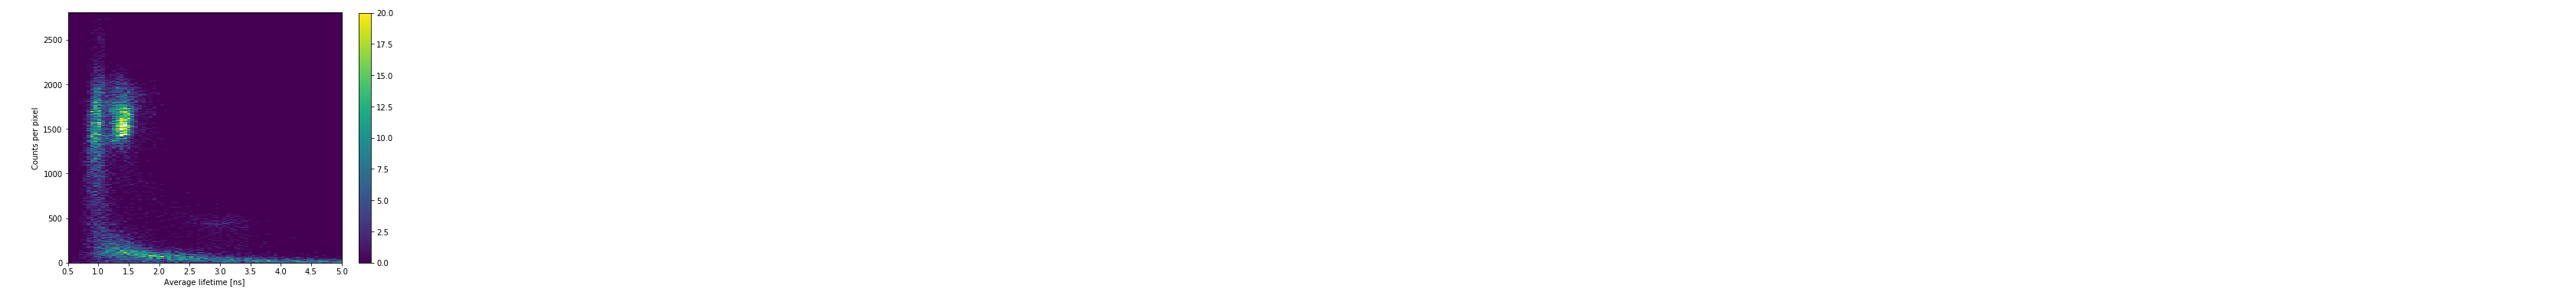

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
plt.hist2d(list(im_lifetime.flat), list(intensity.flat), bins=700, cmin=0 ,cmax=20)
#plt.hist2d(im_lifetime,im_intensity, norm=LogNorm(), bins=40)
plt.ylabel('Counts per pixel');
plt.xlabel('Average lifetime [ns]');
#plt.axis((0.5E-9,2.5E-9,0,1.25E9));
plt.axis((0.5,5,0,2800));
plt.colorbar()
plt.show()

In [109]:
v = pims.TiffStack('daisy3LTfit.tiff')

print('frames: ',len(v))

# the number of frames depends on what exactly the image is formed of. If the exported image is a
# fastFLIM images the tiff file will contain 2 frames:
# intensity
# average lifetime (unfitted, this is the average photon arrival time)
# if like in the below case the tiff contains a fitted FLIM image then the selected channels
# (in this example Amplitude 1..3) will be exported as separate frames

LT1=v[0]
LT2=v[1]
LT3=v[2]

frames:  3


/opt/conda/lib/python3.6/site-packages/tifffile/tifffile.py:2159: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


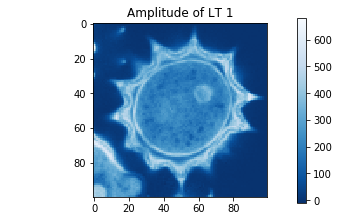

In [112]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('Amplitude of LT 1')
plt.imshow(LT1,cmap="Blues_r")
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

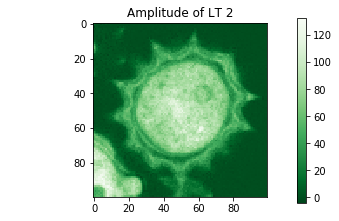

In [113]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('Amplitude of LT 2')
plt.imshow(LT2,cmap="Greens_r")
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

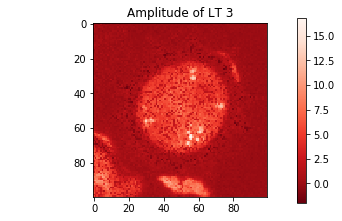

In [115]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('Amplitude of LT 3')
plt.imshow(LT3, cmap="Reds_r")
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()